# Логистическое распределение

Из Википедии "Логисти́ческое распределе́ние в теории вероятностей и математической статистике — 
один из видов абсолютно непрерывных распределений. Формой напоминает нормальное распределение, 
но имеет более «тяжёлые» концы и больший коэффициент эксцесса."

[Материал из Википедии](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import statistics

1000 значений для логистического распределения

In [2]:
e = 2.71828 # чтобы возводить в степень без использования numpy.pow
loc = 0.
scale = 1.
fx = np.random.logistic(loc, scale, 1000)

Функция плотности распределения (формула из Википедии) для логистического распределения
$$\frac{e^{-(x-\mu)/s}}{s(1+e^{-(x-\mu)/s})^2}$$

In [3]:
def pdf(x, mu=loc, sigma=scale):
    return (e ** (-(x - mu) / sigma)) / (sigma * (1 + (e ** (-(x - mu) / sigma))) ** 2)

Строим гистрограмму по значениям сгенерированным выше и накладываем график плотности распределения

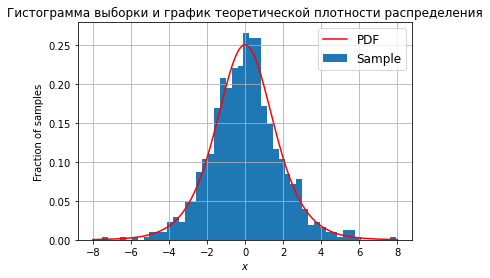

In [4]:
plt.hist(fx, density=True, bins=50, label = 'Sample') # normed=True более не используется


x = np.linspace(-8, 8, 1000)


plt.plot(x, pdf(x), color='r', label = 'PDF')
plt.xlabel('$x$')
plt.ylabel('Fraction of samples')
plt.title('Гистограмма выборки и график теоретической плотности распределения')
plt.legend(fontsize='large')
plt.grid()
plt.show()

Функция для создания массива средних значений из выборки размера n сделанной 1000 раз

In [5]:
def sample(n):
    means = []
    for i in range(1000):
        x = np.random.logistic(loc, scale, n)
        means.append(x.mean())
    print('Mu actual of the sample:', statistics.mean(means))
    return means

Для логистического распределения $$\mu = \mu$$
Дисперсия
$$\frac{\pi^2}{3}s^2$$

Функция для рассчета математического ожидания и стандартного отклонения

In [6]:
def params(n, mu=loc, s=scale):
    sigma = ((np.pi ** 2 / 3 * (s ** 2)) / n ) ** 0.5 # вместо корня квадратного возвожу в степень 1/2 что одно и тоже
    print('Mu:', mu, 'Sigma', sigma)
    return mu, sigma

n = 5

Mu: 0.0 Sigma 0.8111557351947224
Mu actual of the sample: 0.03166681241731061


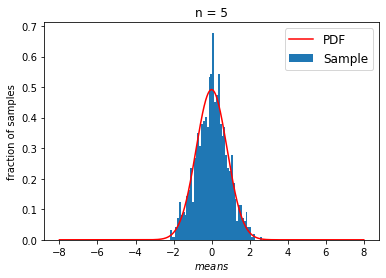

In [10]:
mu_n5, sigma_n5 = params(5)
sample_n5 = sample(5)

plt.hist(sample_n5, density=True, bins=50, label = 'Sample')

plt.plot(x, sc.norm.pdf(x, mu_n5, sigma_n5), color='red', label = 'PDF')

plt.xlabel('$means$')
plt.ylabel('fraction of samples')
plt.title('n = 5')
plt.legend(fontsize='large')

n = 10

Mu: 0.0 Sigma 0.5735737209545476
Mu actual of the sample: 0.007933808184923152


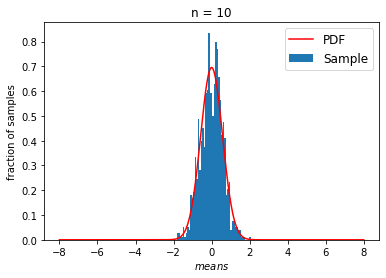

In [11]:
mu_n10, sigma_n10 = params(10)
sample_n10 = sample(10)

plt.hist(sample_n10, density=True, bins=50, label = 'Sample')

plt.plot(x, sc.norm.pdf(x, mu_n10, sigma_n10), color='red', label = 'PDF')

plt.xlabel('$means$')
plt.ylabel('fraction of samples')
plt.title('n = 10')
plt.legend(fontsize='large')

n = 50

Mu: 0.0 Sigma 0.2565099660323728
Mu actual of the sample: -0.00018642456733146921


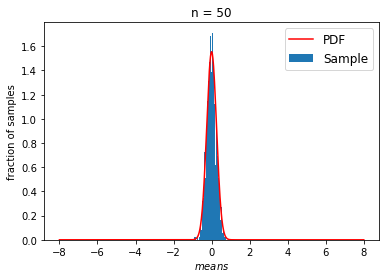

In [12]:
mu_n50, sigma_n50 = params(50)
sample_n50 = sample(50)

plt.hist(sample_n50, density=True, bins=50, label = 'Sample')

plt.plot(x, sc.norm.pdf(x, mu_n50, sigma_n50), color='red', label = 'PDF')

plt.xlabel('$means$')
plt.ylabel('fraction of samples')
plt.title('n = 50')
plt.legend(fontsize='large')

## Вывод

ЦПТ выполняется для логистического распределения.

Чем больше размер выборки, тем меньше стандартное отклонение (средние ближе и стремятся к исходному распределению), тем более "нормально" распределение средних - гистограмма средних все больше сходится к нормальному.